In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [3]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMassVolDec import CenterOfMass



In [4]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          galaxy: name of galaxy
          start: starting snapshot
          End: last snapshot
          n: interger indicating the intervals over which I will return the COM.
    returns: 
    """
    
    # compose the filename for output
    fileout = "Orbit_" + galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    
    if galaxy=='M33':
        delta=0.1
        VolDec=4
    else:
        delta=0.1
        VolDec=5
        

    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    
    snap_ids=np.arange(start,end,n)
    if len(snap_ids)==0:
        print("Ooops thats not valid")
    
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    
    orbit=np.zeros([len(snap_ids),7])
    
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = '000'+ str(snap_id)
        ilbl = ilbl[-3:] #remove last three lines
        
        filename= "%s_"%(galaxy) + ilbl + '.txt'
        # read data in the given file using Read
        time, total, data = Read(filename)                                                                                             


        
        # Initialize an instance of CenterOfMass class, using disk particles
        
        COM=CenterOfMass(filename,2)

        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMP=COM.COM_P(delta, VolDec)
        XCOMP=COMP[0]
        YCOMP=COMP[1]
        ZCOMP=COMP[2]
        #print(XCOMP, YCOMP, ZCOMP)
        COMV=COM.COM_V(XCOMP,YCOMP,ZCOMP)
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i]=(COM.time.value)/1000, *tuple(COMP.value), *tuple(COMV.value)
        
        # print snap_id to see the progress
        #print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    return orbit

# DONT RUN THE NEXT CELL UNLESS YOU NEED TO

In [11]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first!
OrbitCOM('MW',0,800,5)
OrbitCOM('M31',0,800,5)
OrbitCOM('M33',0,800,5)
print('Done!')

array([[ 0.00000e+00, -4.76220e+02,  4.91440e+02, ...,  4.53300e+01,
         1.01980e+02,  1.42020e+02],
       [ 7.14286e-02, -4.72950e+02,  4.98950e+02, ...,  4.82400e+01,
         1.06430e+02,  1.47110e+02],
       [ 1.42857e-01, -4.69310e+02,  5.06760e+02, ...,  5.85400e+01,
         1.11420e+02,  1.50780e+02],
       ...,
       [ 1.12143e+01,  2.16410e+02,  6.01100e+01, ...,  6.62700e+01,
        -1.98590e+02,  3.40100e+01],
       [ 1.12857e+01,  2.19900e+02,  4.50900e+01, ...,  3.12200e+01,
        -2.22500e+02, -1.45200e+01],
       [ 1.13571e+01,  2.20670e+02,  2.86800e+01, ..., -1.20800e+01,
        -2.34280e+02, -7.79000e+01]])

In [5]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MWdata= np.genfromtxt("Orbit_MW.txt",dtype=None, names=True)
M31data= np.genfromtxt("Orbit_M31.txt",dtype=None, names=True)
M33data= np.genfromtxt("Orbit_M33.txt",dtype=None, names=True)

In [6]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

def vectordiff(data1,data2):
    #inputs:
    #   Data1 is first set of data (MW or M33)
    #   data2 is second set of data (M31)
    #retruns:
    #   mag of relative separation and velocity
    
    #initialize the vectors
    Rp=np.zeros(len(data1))
    Rv=np.zeros(len(data1))
    Time=np.zeros(len(MWdata))
    
    #data colomns t=0,x=1,y=2,z=3,vx=4,vy=5,vz=6
    #need for loop because for every ith snapshot you need to subtract each x,y,z,etc comp and store it as ith R value
    for i in range(len(data1)):
        
        x=data1[i][1]-data2[i][1] #x1-x2= xcomp of relative position vector (vector subtraction)
        y=data1[i][2]-data2[i][2]
        z=data1[i][3]-data2[i][3]
        Rp[i]=np.sqrt(x**2+y**2+z**2) #calc mag of relative position

        vx=data1[i][4]-data2[i][4] #similar for velcocity
        vy=data1[i][5]-data2[i][5]
        vz=data1[i][6]-data2[i][6]
        Rv[i]=np.sqrt(vx**2+vy**2+vz**2) #calc mag of relative velocity
        
        #need time for Plot
        Time[i]=MWdata[i][0]
    
    return Rp,Rv,Time


In [8]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
MW_M31_Sep,MW_M31_Vel,T=vectordiff(MWdata,M31data)

# of M33 and M31
M33_M31_Sep,M33_M31_Vel,T2=vectordiff(M33data,M31data)

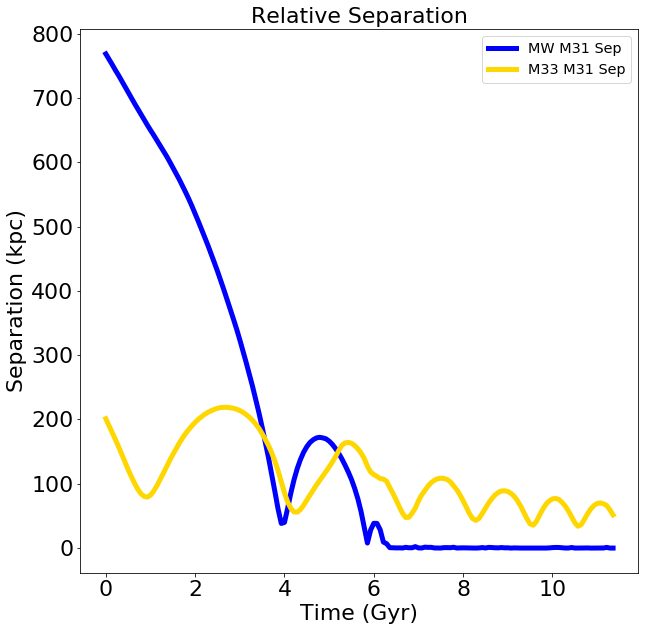

In [20]:
# Plot the Orbit of the galaxies 
#################################
fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the radii as x and Mass on y (y axis log, use semilogy)
ax.plot(T,MW_M31_Sep,color='blue', linewidth=5, label='MW M31 Sep')
ax.plot(T,M33_M31_Sep,color='gold', linewidth=5, label='M33 M31 Sep')

# Add labels
plt.xlabel(r'Time (Gyr)', fontsize=22)
plt.ylabel(r'Separation (kpc)', fontsize=22)
plt.title(r'Relative Separation',fontsize=22)

#x limit
#plt.xlim(6.0, 7.5)   

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')


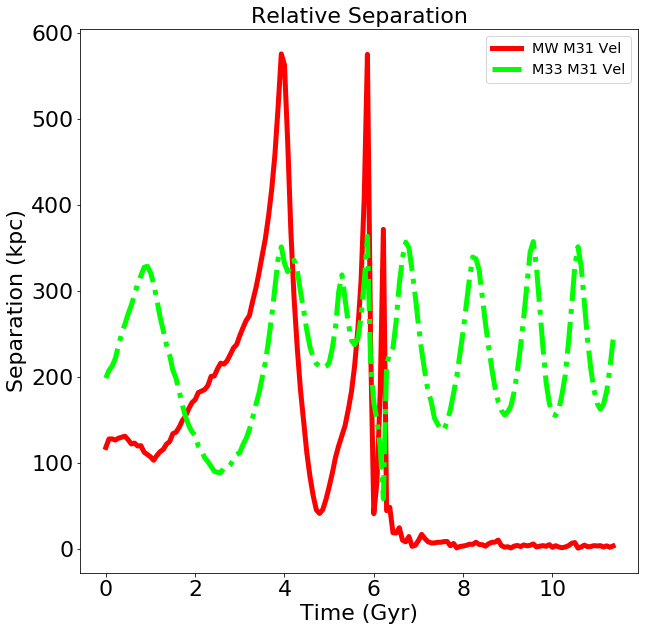

In [7]:
# Plot the orbital velocities of the galaxies 
#################################
fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the radii as x and Mass on y (y axis log, use semilogy)
ax.plot(T2,MW_M31_Vel,color='red', linewidth=5, label='MW M31 Vel')
ax.plot(T2,M33_M31_Vel,color='lime', linewidth=5, linestyle='-.', label='M33 M31 Vel')

# Add labels
plt.xlabel(r'Time (Gyr)', fontsize=22)
plt.ylabel(r'Separation (kpc)', fontsize=22)
plt.title(r'Relative Separation',fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Questions

### 1) How many close encounters will MW and M31 experiance? 

MW and M31 will have 3 close encounters and will merge on the third encounter.

### 2) How is the time evolution of the separation and realtive velocuty related?

The separation and veloctiy are inversly proportional. When the separation is at a minimum, the velocity is at a maximum. When the separation is at a maximum, the velocity is at a minimum.

### 3) When do MW and M31 merge? What happens to M33 when they merge?

MW and M31 will merge in roughly 6.7 Gyrs. M33 appears to orbit the MW+M31 remnant but slowly moving in closer with each orbit.

### BONUS) What is the decay rate of M33's orbit after 6 Gyr. If this rate is constant, how long will it take M33 to merge with the MW+M31 remnant is at a distance of 75 kpc.

Decay rate roughly: 20kpc/1.4Gyr = 14.3 kpc/Gyr      (difference of appogee/orbital period)

75kpc/14.3(kpc/Gyr) = 5.2 Gyr 

If M33 is 75 kpc away it will take roughly 5.2 Gyrs to merge with the MW+M31 remnant. 